### Assignment


In this assignment students have to transform iris data into 3 dimensions and plot a 3d chart with transformed dimensions and color each data point with specific class

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets
from sklearn.decomposition import PCA
import seaborn as sns

##### Load the data and check the shape, we can say it has 4 features

In [3]:
dfIris = datasets.load_iris().data

In [4]:
dfIris.shape

(150, 4)

##### Crete a PCA object with 3 components i.e. to reduce features from 4 to 3

In [5]:
pcaObj = PCA(n_components=3)

In [6]:
pcaObj.fit(dfIris)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [7]:
pcaObj.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102],
       [-0.58202985,  0.59791083,  0.07623608,  0.54583143]])

##### Convert or transform the original data from 4 to 3 featuers, looks like first feature shows highest variance from variance ratio

In [8]:
dfIrisTransformed = pcaObj.transform(dfIris)

In [9]:
pcaObj.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261])

In [10]:
dfIrisTransformed.shape

(150, 3)

##### from above, it looks like first column of transformed columns has more variance than anybody else. Lets check range of values using histogram to split data for giving different colors to different different groups

(array([38., 12.,  0.,  4., 13., 23., 25., 20., 10.,  5.]),
 array([-3.22380374, -2.52185883, -1.81991391, -1.11796899, -0.41602408,
         0.28592084,  0.98786576,  1.68981067,  2.39175559,  3.09370051,
         3.79564542]),
 <a list of 10 Patch objects>)

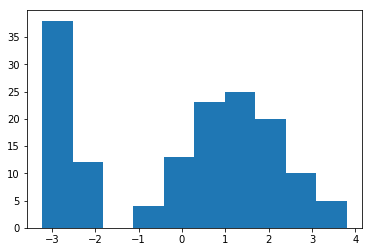

In [11]:
plt.hist(dfIrisTransformed[:,0])

In [12]:
# Lets give color by three ranges of new transformed columns, those ranges are feature < -1.5, -1.5 < feature < 1, feature >= 1
col = list()
for i in range(150):
    if(dfIrisTransformed[i,0] < -1.5):
        col.append('r')
    elif (dfIrisTransformed[i,0] >= -1.5 and dfIrisTransformed[i,0]< 1):
        col.append('b')
    else:
        col.append('g')

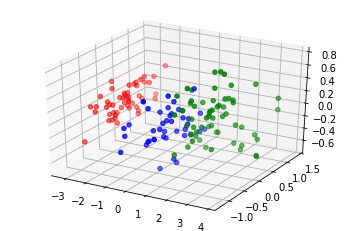

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dfIrisTransformed[:,0], dfIrisTransformed[:, 1], dfIrisTransformed[:,2], c=col)
plt.show()